<a href="https://colab.research.google.com/github/Ahnaf-r71/Admission_prediction/blob/main/AdmissionPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 The code aims to predict the likelihood of admission to a university based on various factors provided in a dataset.

Dataset:

    The dataset contains information on 400 applicants, including their GRE scores, TOEFL scores, university ratings, statement of purpose (SOP), letters of recommendation (LOR), undergraduate GPA (CGPA), and research experience.

Prediction Target:

    The target variable is the "Chance of Admit" column in the dataset, representing the probability of an applicant being admitted to the university. This variable is used for both linear regression and K-nearest neighbors classification tasks.

Tasks:

    Linear Regression:
        Utilizes the GRE scores of applicants to predict their chances of admission using a simple linear regression model. The model assesses the relationship between GRE scores and admission probabilities, providing insights into how well GRE scores correlate with admission chances.
    K-Nearest Neighbors (KNN):
        Classifies applicants into "High" or "Low" chance of admission categories based on multiple features including GRE scores, TOEFL scores, university ratings, SOP, LOR, CGPA, and research experience.
        Normalizes the feature values to prevent bias and uses KNN with k=3k=3 to classify applicants.
        Evaluates the model's accuracy on a randomly selected test dataset of size 100.
        Generates a graph depicting the accuracy of the KNN model for different values of kk (3, 5, 7, 9) to identify the optimal kk value for the model.



    The code can be useful for university admissions offices to assess the likelihood of admitting prospective students based on their academic credentials.
    It can also serve as a learning resource for understanding and implementing linear regression and K-nearest neighbors algorithms for predictive modeling tasks.

Mounted at /content/drive
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of 

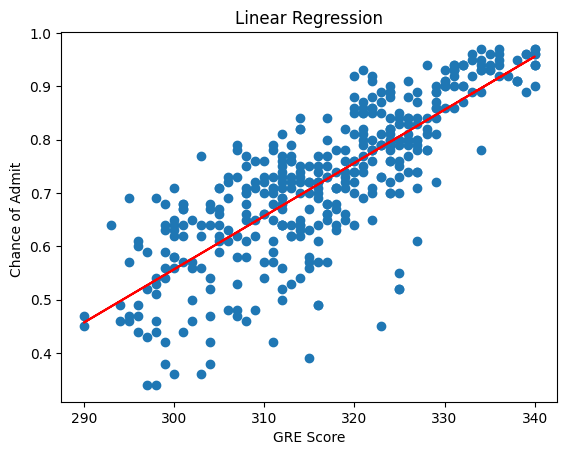

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

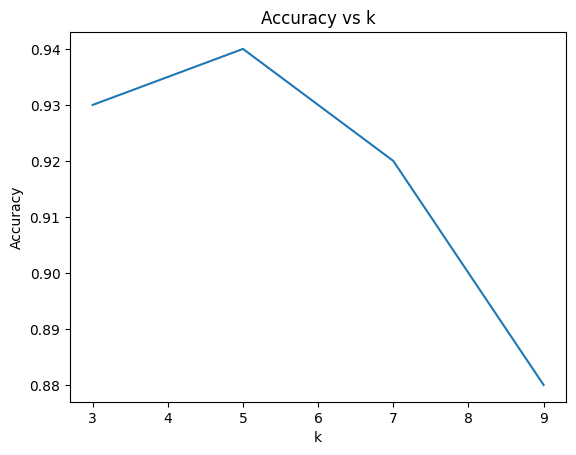

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
# Define functions for K Nearest Neighbors
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

def k_nearest_neighbors(new_image, train_images, train_labels, k=1):
    distances = euclidean_distance(new_image, train_images)
    sorted_index = np.argsort(distances)
    sum_labels = np.sum(train_labels[sorted_index[:k]])
    return 1 if sum_labels > (k / 2) else 0

# Loading  the dataset for Linear Regression
data_path = '/content/drive/MyDrive/labmid/Admission_Predict.csv'
data = pd.read_csv(data_path)

print(data) # checking if data is read correctly
# Extract features (GRE Score) and target variable (Chance of Admit)
X = data["GRE Score"].to_numpy().reshape(-1, 1)
y = data["Chance of Admit "].to_numpy()

# Fit a polynomial of degree 1 (linear fit) using np.polyfit
coefficients = np.polyfit(X.flatten(), y, 1)
beta_1, beta_0 = coefficients

print("Coefficients:")
print("beta_0:", beta_0)
print("beta_1:", beta_1)

# Ploting the regression line and scatter plot
plt.scatter(X, y)
plt.plot(X, beta_0 + beta_1 * X.flatten(), color='red')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit ")
plt.title("Linear Regression")
plt.show()

# Loading  the dataset for K Nearest Neighbors
path = '/content/drive/MyDrive/labmid/Admission_Predict.csv'
data = pd.read_csv(path)
print(data) # checking if data is read correctly
# Extract features and target variable
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].to_numpy()
y = (data['Chance of Admit '] > 0.5).astype(int)

# Normalize the feature values
X_normalized = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Randomly select test data of size 100
np.random.seed(42)
test_indices = np.random.choice(len(X_normalized), size=100, replace=False)
X_test = X_normalized[test_indices]
y_test = y[test_indices]

# Calculate accuracy using KNN with k=3
y_pred = np.array([k_nearest_neighbors(x, X_normalized, y, k=3) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print("Accuracy with k=3:", accuracy)

# Plot accuracy vs k graph for k=3, 5, 7, 9
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    y_pred = np.array([k_nearest_neighbors(x, X_normalized, y, k=k) for x in X_test])
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()
